In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255, X_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3028 - accuracy: 0.9111 - val_loss: 0.1359 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1445 - accuracy: 0.9566 - val_loss: 0.1009 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9671 - val_loss: 0.0891 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0796 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9771 - val_loss: 0.0738 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9814 - val_loss: 0.0756 - val_accuracy:

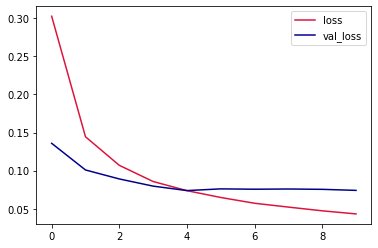

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss', color='crimson')
plt.plot(r.history['val_loss'], label='val_loss', color='darkblue')
plt.legend()

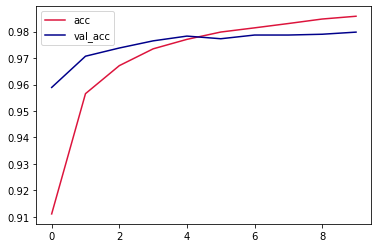

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='crimson')
plt.plot(r.history['val_accuracy'], label='val_acc', color='darkblue')
plt.legend()

In [ ]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9798
[0.07405563443899155, 0.9797999858856201]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, 
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalize confusion matrix')
    else:
        print('Confusion matrix without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(ticks_mark, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black'
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix (y_test, p_test)